In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1.8)

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import missingno as msno
import random

from plotly import tools

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [33]:
conda install -c conda-forge missingno

Solving environment: ...working... done

## Package Plan ##

  environment location: F:\installitations

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         184 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    conda-4.8.3                |   py36h9f0ad1d_1         3.1 MB  conda-forge
    matplotlib-base-3.2.1      |   py36hf0cddfc_0         7.1 MB  conda-forge
    missingno-0.4.2            |             py_1          12 KB  conda-forge
    openssl-1.1.1f             |       hfa6e2cd_0         4.7 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        15.2 MB

The following NEW packages will



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename F:\installitations\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.  Please remove this file manually (you may need to reboot to free file handles)


In [88]:
df_app = pd.read_csv('C:\\Users\\venkat333\\Desktop\\tasks\\task2\\apple\\AppleStore.csv')
df_description = pd.read_csv('C:\\Users\\venkat333\\Desktop\\tasks\\task2\\apple\\appleStore_description.csv')

In [89]:
df_app.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [90]:
df_description.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [91]:
df_description.isnull().sum()

id            0
track_name    0
size_bytes    0
app_desc      0
dtype: int64

In [92]:
df_app['app_desc'] = df_description['app_desc']

In [93]:
df_app = df_app.iloc[:, 1:]

In [94]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


In [95]:
df_app['size_bytes_in_MB'] = df_app['size_bytes'] / (1024 * 1024.0)

In [96]:
df_app['isNotFree'] = df_app['price'].apply(lambda x: 1 if x > 0 else 0)

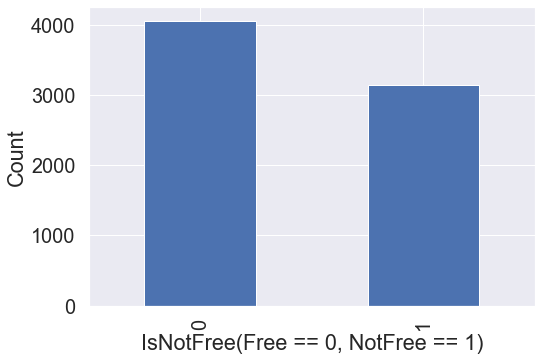

In [97]:
df_app['isNotFree'].value_counts().plot.bar()
plt.xlabel('IsNotFree(Free == 0, NotFree == 1)')
plt.ylabel('Count')
plt.show()

In [98]:
df_app_notfree = df_app[df_app['isNotFree'] == 1]
df_app_free = df_app[df_app['isNotFree'] == 0]

print('There are {} Not-Free Apps in this dataset'.format(df_app_notfree.shape[0]))
print('There are {} Free Apps in this dataset'.format(df_app_free.shape[0]))


There are 3141 Not-Free Apps in this dataset
There are 4056 Free Apps in this dataset


In [99]:
def random_color_generator(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

cnt_srs = df_app['prime_genre'].value_counts()
text = ['{:.2f}%'.format(100 * (value / cnt_srs.sum())) for value in cnt_srs.values]

trace = go.Bar(
    x = cnt_srs.index,
    y = cnt_srs.values,
    text = text,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)
data = [trace]

layout = go.Layout(
    title = 'Prime genre',
    margin = dict(
        l = 100
    ),
    xaxis = dict(
        title = 'Genre'
    ),
    yaxis = dict(
        title = 'Count'
    ),
    width = 800,
    height = 500
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [100]:
cnt_srs1 = df_app_free['prime_genre'].value_counts()
text1 = ['{:.2f}%'.format(100 * (value / cnt_srs1.sum())) for value in cnt_srs1.values]

trace1 = go.Bar(
    x = cnt_srs1.index,
    y = cnt_srs1.values,
    text = text1,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)

cnt_srs2 = df_app_notfree['prime_genre'].value_counts()
text2 = ['{:.2f}%'.format(100 * (value / cnt_srs2.sum())) for value in cnt_srs2.values]

trace2 = go.Bar(
    x = cnt_srs2.index,
    y = cnt_srs2.values,
    text = text2,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)

trace3 = go.Bar(
    x = cnt_srs1.index,
    y = cnt_srs1.values,
    text = text1,
    opacity = 0.7,
    name='Free'
)


trace4 = go.Bar(
    x = cnt_srs2.index,
    y = cnt_srs2.values,
    text = text2,
    opacity = 0.7,
    name='Not-Free'
)



fig = tools.make_subplots(rows=2, cols=2, specs = [[{}, {}], [{'colspan':2}, None]], 
                          subplot_titles=('(1) Countplot for Prime_genre of Free', '(2) Countplot for Prime_genre of Not-Free', 
                                          '(3) Grouped barplot containing Free(green) and Not-Free(red)'), print_grid=False)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 1)

fig['layout']['yaxis1'].update(title='Count')
fig['layout']['yaxis2'].update(title='Count')
fig['layout']['yaxis3'].update(title='Count')

fig['layout'].update(showlegend=False, width=800, height=800)

py.iplot(fig)

Figure 1
For Free App, Top 3 is below.
(1) Games (2) Entertainments (3) Photo & Video

Figure 2
For Not-Free App, Top 3 is below
(1) Games (2) Education (3) Entertainments

Figure 3
Many social network App is free.
below are Not-free social networking App. Do you know these Apps?

In [101]:
for app in df_app.loc[(df_app['isNotFree'] == 1) & (df_app['prime_genre'] == 'Social Networking'), 'track_name'].values:
    print(app)

Bowitter for iPhone
Badoo Premium - Meet new people. Extra features.
Fake Location
Who Deleted Me? for Facebook
TeamSpeak 3
Threema
Followers + EA - Analytics for Instagram
VVebo - 微博客户端
feather for Twitter
Repost It! for Instagram Pro - Video Photo Whiz
InsSave - Download & Save Photos & Videos From Instagram With Ease!
Love Msg
Remove Caption for Snapchat* Screenshots
WeicoPro 4
一言-记录字句，发现共鸣
Tweetbot 4 for Twitter
狼人之夜
InsPad - Instagram for iPad
ChatMate for WhatsApp
Todrick
Littlebook - for Facebook on Watch
求恋爱 专业版-高端恋爱相亲婚恋交友神器,同城寂寞单身男女聊天约会找对象平台
Not Karlton Banks Emojis by Eboticons
Demi Lovato Stickers


In [16]:
cnt_srs = df_app[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)

trace = go.Bar(
    x = cnt_srs.index,
    y = cnt_srs.values,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)
data = [trace]

layout = go.Layout(
    title = 'User rating depending on Prime genre',
    margin = dict(
        l = 100
    ),
    xaxis = dict(
        title = 'Genre'
    ),
    yaxis = dict(
        title = 'Mean User Rating'
    ),
    width = 800,
    height = 500
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

1.With not considering 'isNotFree', The Apps for Productivity, Music and Photo & Vidio have higher mean user rating.
2.The mean user rating of Book, Finance and Catalogs are less than 2.5.

In [102]:
cnt_srs1 = df_app_free[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)
text1 = ['{:.2f}%'.format(100 * (value / cnt_srs1.sum())) for value in cnt_srs1.values]

trace1 = go.Bar(
    x = cnt_srs1.index,
    y = cnt_srs1.values,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)

cnt_srs2 = df_app_notfree[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)
text2 = ['{:.2f}%'.format(100 * (value / cnt_srs2.sum())) for value in cnt_srs2.values]

trace2 = go.Bar(
    x = cnt_srs2.index,
    y = cnt_srs2.values,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)

trace3 = go.Bar(
    x = cnt_srs1.index,
    y = cnt_srs1.values,
    opacity = 0.7,
    name='Free'
)


trace4 = go.Bar(
    x = cnt_srs2.index,
    y = cnt_srs2.values,
    opacity = 0.7,
    name='Not-Free'
)



fig = tools.make_subplots(rows=2, cols=2, specs = [[{}, {}], [{'colspan':2}, None]], 
                          subplot_titles=('(1) Mean user rating of Free', '(2) Mean user rating of Not-Free', 
                                          '(3) Grouped barplot containing Free(green) and Not-Free(red)'), print_grid=False)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 1)

fig['layout']['yaxis1'].update(title='Mean User Rating')
fig['layout']['yaxis2'].update(title='Mean User Rating')
fig['layout']['yaxis3'].update(title='Mean User Rating')
fig['layout'].update(showlegend=False, width=800, height=800)

py.iplot(fig)

Figure 1
For Free App, Top 3 is below.
(1) Productivity (2) Music (3) Photo & Video

Figure 2
For Not-Free App, Top 3 is below
(1) Catalogs (2) Shopping (3) Productivity

Figure 3
Book, Catalogs and Navigation Apps have much higher ratings when they are Not-free.

In [18]:
cnt_srs = df_app[['prime_genre', 'size_bytes_in_MB']].groupby('prime_genre').mean()['size_bytes_in_MB'].sort_values(ascending=False)
text = ['{:.2f}'.format(value) for value in cnt_srs.values]

trace = go.Bar(
    x = cnt_srs.index,
    y = cnt_srs.values,
    marker = dict(
        color = random_color_generator(100),
        line = dict(color='rgb(8, 48, 107)',
                    width = 1.5)
    ),
    opacity = 0.7
)
data = [trace]

layout = go.Layout(
    title = 'Mean App size(MB) depending on Prime genre',
    margin = dict(
        l = 100
    ),
    xaxis = dict(
        title = 'Genre'
    ),
    yaxis = dict(
        title = 'Mean App size'
    ),
    width = 800,
    height = 500
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

When considering only Not-Free apps, Medical App is the most expensive, near to 14$.

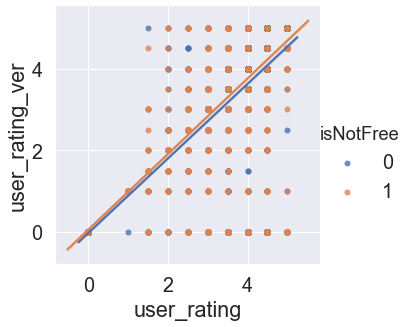

In [103]:
sns.lmplot(x='user_rating', y='user_rating_ver', hue='isNotFree', data=df_app)

In [104]:
df_temp = df_app.drop('id', axis=1)

In [105]:
data = [
    go.Heatmap(
        z = df_temp.corr().values,
        x = df_temp.corr().columns.values,
        y = df_temp.corr().columns.values,
        colorscale='YlGnBu',
        reversescale=False,
    )
]

layout = go.Layout(
    title='Pearson Correlation of float-type features',
    xaxis = dict(ticks=''),
    yaxis = dict(ticks='' ),
    width = 800, height = 800,
    margin = dict(
        l = 100
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [106]:
df_corr = df_app.drop('id', axis=1).corr()

In [107]:
df_corr['user_rating'].sort_values(ascending=False)

user_rating         1.000000
user_rating_ver     0.774140
ipadSc_urls.num     0.265671
lang.num            0.170976
isNotFree           0.112472
rating_count_tot    0.083310
vpp_lic             0.069816
rating_count_ver    0.068754
size_bytes_in_MB    0.066256
size_bytes          0.066256
price               0.046601
sup_devices.num    -0.042451
Name: user_rating, dtype: float64

In [108]:
df_corr['price'].sort_values(ascending=False)

price               1.000000
isNotFree           0.336317
size_bytes_in_MB    0.182392
size_bytes          0.182392
ipadSc_urls.num     0.066100
user_rating         0.046601
user_rating_ver     0.025173
lang.num           -0.006713
rating_count_ver   -0.018012
vpp_lic            -0.029942
rating_count_tot   -0.039044
sup_devices.num    -0.115361
Name: price, dtype: float64

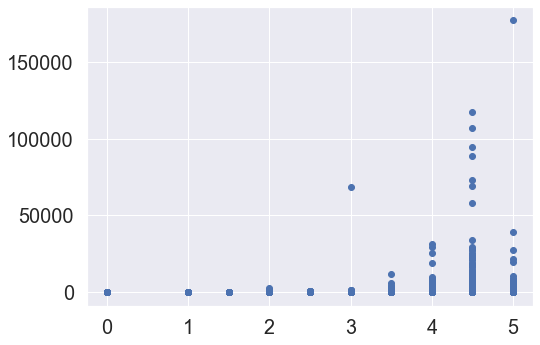

In [109]:
plt.scatter(df_app['user_rating'], df_app['rating_count_ver'])

DESCRIPTION

In [110]:
foo = df_app['app_desc'][0].split(' ')

In [111]:
import nltk
from nltk.corpus import stopwords

In [112]:
%%time
for i in range(df_app.shape[0]):
    temp_desc = df_app['app_desc'][i]
    temp_word_list = nltk.word_tokenize(temp_desc)
    temp_word_list = [word.lower() for word in temp_word_list if word not in stopwords.words('english')]
    for char in " {}()#&[]^`´-_·@|¿?¡!'+*\"?.!/;:<>’•“”–»%■,":
        for ele in temp_word_list:
            if char in ele:
                temp_word_list.remove(ele)
    fdist = nltk.FreqDist(temp_word_list)
    temp_srs = pd.Series(fdist).sort_values(ascending=False)
    try:
        df_app.loc[i, 'most_freq_word_1'] = temp_srs.index[0]
        df_app.loc[i, 'most_freq_word_2'] = temp_srs.index[1]
        df_app.loc[i, 'most_freq_word_3'] = temp_srs.index[2]
    except:
        df_app.loc[i, 'most_freq_word_1'] = temp_srs.index[0]

Wall time: 20min 44s


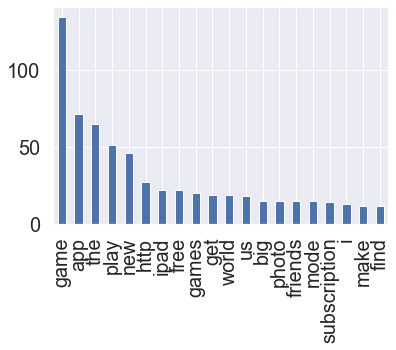

In [29]:
df_app.loc[df_app['user_rating'] > 4, 'most_freq_word_3'].value_counts().head(20).plot.bar()

In [113]:
freq_total = nltk.FreqDist(df_app['most_freq_word_1'].tolist() + 
              df_app['most_freq_word_2'].tolist() +
             df_app['most_freq_word_3'].tolist())

In [114]:
freq_total = pd.Series(freq_total).sort_values(ascending=False)

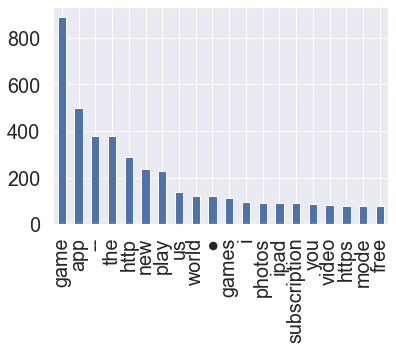

In [32]:
freq_total.head(20).plot.bar()

SIMPLE FUTURE ENGINEERING

In [115]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [116]:
df_app['rating_count_before'] = df_app['rating_count_tot'] - df_app['rating_count_ver']

In [35]:
df_app.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,...,ipadSc_urls.num,lang.num,vpp_lic,app_desc,size_bytes_in_MB,isNotFree,most_freq_word_1,most_freq_word_2,most_freq_word_3,rating_count_before
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,...,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.119141,1,new,game,arcade,21266
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,...,5,23,1,Let Evernote change the way you organize your ...,151.232422,0,evernote,notes,work,161039
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,...,5,3,1,Download the most popular free weather app pow...,95.867188,0,weather,alerts,lightning,185761
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,...,5,9,1,The eBay app is the best way to find anything ...,122.558594,0,items,ebay,find,261592
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,...,5,45,1,On more than 250 million devices around the wo...,88.476562,0,bible,the,app,980600


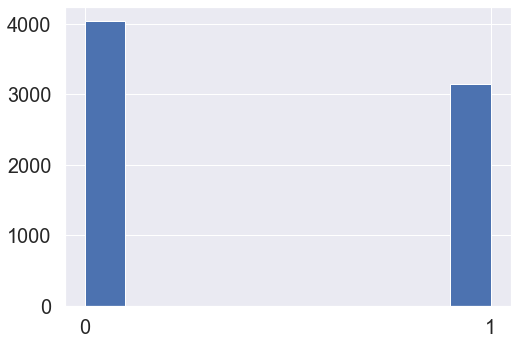

In [117]:
df_train = df_app[['size_bytes_in_MB', 'isNotFree', 'price', 'rating_count_before', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'prime_genre']]
target = df_app['user_rating']

df_train = pd.get_dummies(df_train)

def categorize_rating(x):
    if x <= 4:
        return 0
    else:
        return 1

target = target.apply(categorize_rating)

target.astype(str).hist()

In [118]:
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2, random_state=1989, stratify=target)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


X_train shape: (5757, 31)
X_test shape: (1440, 31)


In [73]:
!pip install lightgbm

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [69]:
X_train

array([[136.90039062,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 63.40234375,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [377.23828125,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 83.4140625 ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [621.7265625 ,   1.        ,   0.99      , ...,   0.        ,
          0.        ,   0.        ],
       [ 12.44726562,   1.        ,   4.99      , ...,   0.        ,
          0.        ,   0.        ]])

In [39]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [41]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [44]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       809
           1       0.63      0.57      0.60       631

    accuracy                           0.66      1440
   macro avg       0.66      0.65      0.65      1440
weighted avg       0.66      0.66      0.66      1440



In [50]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[595 214]
 [273 358]]


In [51]:
from sklearn.linear_model import SGDClassifier

In [52]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [53]:
print(classification_report(y_test
                            , pred_sgd))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       809
           1       0.50      0.00      0.00       631

    accuracy                           0.56      1440
   macro avg       0.53      0.50      0.36      1440
weighted avg       0.53      0.56      0.41      1440



from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(trainy,pred_train_3) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(trainy,pred_train_3)) 
print('Report : ')
print(classification_report(trainy,pred_train_3))

# LGM

In [54]:
from lightgbm import LGBMClassifier
lgbm= LGBMClassifier(num_leaves=80,n_estimators =600,random_state=0,learning_rate = 0.1,subsample=0.8)
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=600, n_jobs=-1, num_leaves=80, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

In [56]:
import time
#from sklearn.metrics import recall_score
start_time = time.time()
y_train_pred_lgbm = lgbm.predict(X_train)
y_valid_pred_lgbm = lgbm.predict(X_test)
#y_test_pred_lgbm = lgbm.predict(tdata)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5589148998260498 seconds ---


In [58]:
from sklearn.metrics import classification_report


def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred))

In [60]:
classifcation_report_train_test(y_train, y_train_pred_lgbm, y_test, y_valid_pred_lgbm)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3233
           1       1.00      0.99      0.99      2524

    accuracy                           1.00      5757
   macro avg       1.00      0.99      1.00      5757
weighted avg       1.00      1.00      1.00      5757


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       809
           1       0.60      0.58      0.59       631

    accuracy                           0.65      1440
   macro avg       0.64      0.64      0.64      1440
weighted avg       0.65      0.65      0.65      1440



# XG BOOSTING

In [61]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=8,n_estimators=600,learning_rate=0.1,subsample=0.8)
model.fit(X_train,y_train)#better 6 depth

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [62]:
start_time = time.time()
y_train_pred_xgbm = model.predict(X_train)
y_valid_pred_xgbm = model.predict(X_test)
#y_test_pred_lgbm = lgbm.predict(tdata)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.683457612991333 seconds ---


In [63]:
classifcation_report_train_test(y_train, y_train_pred_xgbm, y_test, y_valid_pred_xgbm)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3233
           1       1.00      0.99      0.99      2524

    accuracy                           0.99      5757
   macro avg       0.99      0.99      0.99      5757
weighted avg       0.99      0.99      0.99      5757


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       809
           1       0.60      0.60      0.60       631

    accuracy                           0.65      1440
   macro avg       0.65      0.65      0.65      1440
weighted avg       0.65      0.65      0.65      1440



# Decision tree Classifier

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
clf_dt = Pipeline(steps=[('classifier', DecisionTreeClassifier())])
depths = np.arange(1, 13)


dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 'classifier__max_depth': depths, 
                 "classifier__min_samples_split":[30,35,40,50] ,"classifier__min_samples_leaf": [5,10,20]}

dt_grid = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5)
dt_grid.fit(X_train,y_train)

#{'classifier__criterion': 'entropy',
 #'classifier__max_depth': 14,
 #'classifier__min_samples_leaf': 10,
 #'classifier__min_samples_split': 40} # 64T ,63V

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                               min_weight_fraction_leaf=0.0,
   

In [121]:
dt_grid.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 DecisionTreeClassifier(class_weight=None, criterion='entropy',
                                        max_depth=7, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=5,
                                        min_samples_split=35,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

In [122]:
dt_grid.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 7,
 'classifier__min_samples_leaf': 5,
 'classifier__min_samples_split': 35}

In [73]:
dt_grid_predict_train=dt_grid.best_estimator_.predict(X_train)
dt_grid_predict_valid=dt_grid.best_estimator_.predict(X_test)

In [74]:
classifcation_report_train_test(y_train, dt_grid_predict_train, y_test, dt_grid_predict_valid)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      3233
           1       0.69      0.64      0.66      2524

    accuracy                           0.72      5757
   macro avg       0.71      0.71      0.71      5757
weighted avg       0.71      0.72      0.71      5757


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       809
           1       0.61      0.56      0.58       631

    accuracy                           0.65      1440
   macro avg       0.65      0.64      0.64      1440
weighted avg       0.65      0.65      0.65      1440



In [ ]:

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc_3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [3,4,5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [12,13,14],
    'criterion' :['gini', 'entropy']
}
# Create grid search object
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_estimator_
rf_predict_train=CV_rfc.best_estimator_.predict(X_train)
rf_predict_valid=CV_rfc.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, rf_predict_train, y_test, rf_predict_valid)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      3233
           1       0.82      0.75      0.79      2524

    accuracy                           0.82      5757
   macro avg       0.82      0.81      0.81      5757
weighted avg       0.82      0.82      0.82      5757


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       809
           1       0.62      0.58      0.60       631

    accuracy                           0.66      1440
   macro avg       0.65      0.65      0.65      1440
weighted avg       0.66      0.66      0.66      1440



In [88]:
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2, random_state=1989, stratify=target)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (5757, 33)
X_test shape: (1440, 33)


In [77]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_train_pred_lgr = log_reg.predict(X_train)
y_valid_pred_lgr = log_reg.predict(X_test)

In [78]:
classifcation_report_train_test(y_train, y_train_pred_lgr, y_test, y_valid_pred_lgr)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      3233
           1       0.59      0.33      0.42      2524

    accuracy                           0.61      5757
   macro avg       0.60      0.58      0.56      5757
weighted avg       0.60      0.61      0.58      5757


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.61      0.82      0.70       809
           1       0.58      0.32      0.41       631

    accuracy                           0.60      1440
   macro avg       0.59      0.57      0.55      1440
weighted avg       0.59      0.60      0.57      1440



In [79]:
# Grid search cross validation
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.6192461351398297


In [80]:
logreg2=LogisticRegression(C=10,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.6055555555555555


In [81]:
reg_predict_train=logreg2.predict(X_train)
reg_predict_test=logreg2.predict(X_test)
classifcation_report_train_test(y_train, reg_predict_train, y_test, reg_predict_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      3233
           1       0.59      0.34      0.43      2524

    accuracy                           0.61      5757
   macro avg       0.60      0.58      0.57      5757
weighted avg       0.60      0.61      0.58      5757


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.61      0.82      0.70       809
           1       0.59      0.33      0.43       631

    accuracy                           0.61      1440
   macro avg       0.60      0.58      0.56      1440
weighted avg       0.60      0.61      0.58      1440



In [82]:
from sklearn.svm import SVC

In [83]:
svc = SVC()
svc.fit(X_train, y_train)
print("score",svc.score(X_test,y_test))

score 0.6013888888888889


In [84]:
svc_predict_train=svc.predict(X_train)
svc_predict_test=svc.predict(X_test)
classifcation_report_train_test(y_train, svc_predict_train, y_test, svc_predict_test)



               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3233
           1       0.99      0.92      0.95      2524

    accuracy                           0.96      5757
   macro avg       0.97      0.96      0.96      5757
weighted avg       0.96      0.96      0.96      5757


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.71      0.49      0.58       809
           1       0.53      0.75      0.62       631

    accuracy                           0.60      1440
   macro avg       0.62      0.62      0.60      1440
weighted avg       0.63      0.60      0.60      1440



In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [ ]:
#Finding best parameters for our SVC model
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)

In [ ]:
grid_svc.best_params_

In [ ]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train,y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))